اضافه کردن کتابخانه‌ها

In [1]:
import matplotlib.pyplot as plt
import numpy as np

خواندن داده‌ها از فایل

In [2]:
simple_mst = np.genfromtxt("max_edge_2_1024.csv", delimiter=',');
simple_mst

array([[2.00000e+00, 7.23626e-01, 7.23626e-01, 1.20000e-05],
       [2.00000e+00, 4.57429e-03, 4.57429e-03, 3.00000e-06],
       [2.00000e+00, 5.53094e-01, 5.53094e-01, 3.00000e-06],
       ...,
       [1.02400e+03, 1.22454e+00, 7.03540e-03, 2.10938e-01],
       [1.02400e+03, 1.23115e+00, 1.01305e-02, 2.09582e-01],
       [1.02400e+03, 1.21131e+00, 9.75414e-03, 2.11318e-01]])

تعریف تابع تعیین وزن‌ها

In [202]:
def k1(n):
    """Calculates a theoretical bound for the maximum edge weight.

    Args:
        n (int): The number of vertices.

    Returns:
        float: A float representing the theoretical bound.
    """
    return (0.999)**(n-140)*1.2/(np.power(n,0.1)*np.log(n))

k(8192)

1.715475950274545e-05

In [221]:
def k2(n):
    """Calculates a theoretical bound for the maximum edge weight.
    This function is also used in the C++ code.

    Args:
        n (int): The number of vertices.

    Returns:
        float: A float representing the theoretical bound.
    """
    return 0.04+(np.power(0.992,n))/(np.power(n,0.05)*np.log(n)/np.log(4.5))

t(8192)

0.04

شمردن تعداد خطاها در نقاط بررسی شده

In [224]:
colors = ['g' if simple_mst[:,2][i]<=k1(simple_mst[:,0][i]) else 'y' for i in range(len(simple_mst[:,0]))]
list(colors).count('y')

8

رسم نمودار سنگین‌ترین یال درخت کمینه‌ی پوشا، بر اساس تعداد رئوس

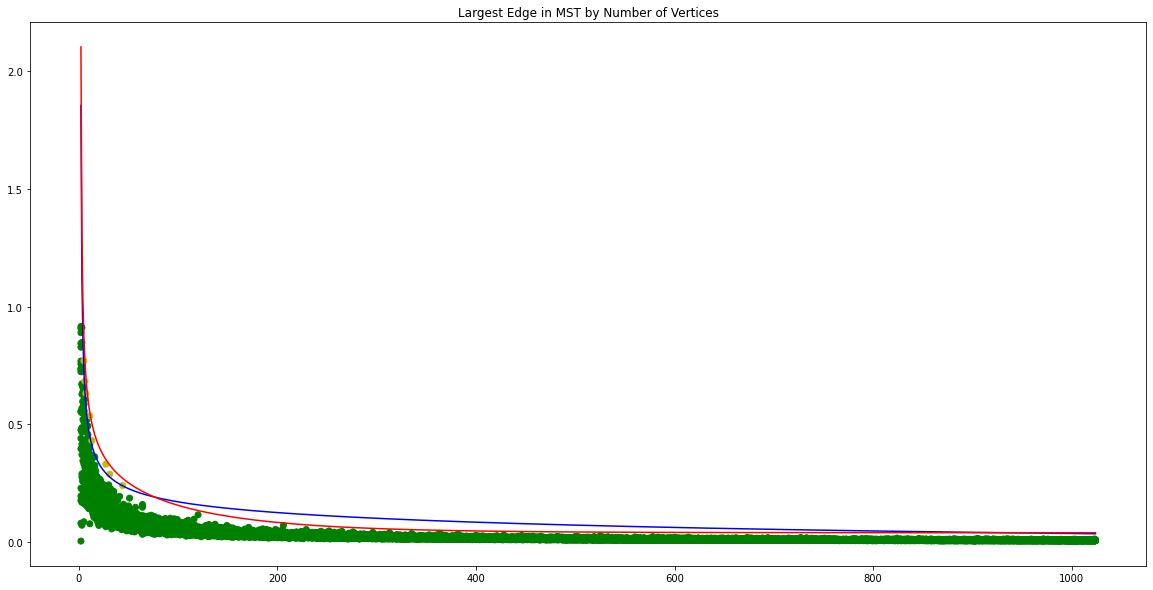

In [222]:
plt.figure(figsize=(20,10))
plt.title("Largest Edge in MST by Number of Vertices")
plt.plot(simple_mst[:,0], [k1(n) for n in simple_mst[:,0]], c='b')
plt.plot(simple_mst[:,0], [k2(n) for n in simple_mst[:,0]], c='r')
plt.scatter(simple_mst[:,0], simple_mst[:,2], c=colors)

بررسی نتیجه‌ی نهایی

In [268]:
first_result = pd.read_csv('max_edge_2_1024.csv', header=None)
first_result.columns = ['n_vertices', 'mst_cost', 'max_edge', 'time_spent']
first_result.groupby(by='n_vertices').mean()['time_spent'].iloc[0]

3.2e-06

In [253]:
import pandas as pd
final_result = pd.read_csv('result.csv', header=None)
final_result.columns = ['n_vertices', 'mst_cost', 'max_edge', 'time_spent']
final_result.describe()

,n_vertices,mst_cost,max_edge,time_spent
count,200.000000,200.000000,200.000000,200.000000
mean,1636.800000,1.200922,0.049018,0.084980
std,2510.025278,0.144017,0.065690,0.195132
min,16.000000,0.661582,0.000893,0.000024
25%,64.000000,1.156427,0.003950,0.000102
50%,384.000000,1.202930,0.016646,0.001280
75%,2048.000000,1.234800,0.065104,0.033986
max,8192.000000,1.734100,0.291155,0.666435


گروه‌بندی داده‌ها بر اساس تعداد رئوس - میانگین زمان اجرا

In [254]:
final_result.groupby(by='n_vertices').mean()['time_spent']

n_vertices
16      0.000030
32      0.000089
64      0.000161
128     0.000223
256     0.000617
512     0.001912
1024    0.007731
2048    0.033999
4096    0.151774
8192    0.653266
Name: time_spent, dtype: float64

گروه‌بندی داده‌ها بر اساس تعداد رئوس - میانگین هزینه‌ی درخت کمینه‌ی پوشا

In [258]:
final_result.groupby(by='n_vertices').mean()['mst_cost']

n_vertices
16      1.212090
32      1.209557
64      1.185509
128     1.211534
256     1.186387
512     1.200954
1024    1.194176
2048    1.203449
4096    1.200361
8192    1.205207
Name: mst_cost, dtype: float64

بررسی روند تغییر مجموع وزن‌ها بر اساس تعداد راس